In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib as plt  # For plotting (incorrect import, should be matplotlib.pyplot)
import seaborn as sns  # For advanced data visualization

In [2]:
# Load the dataset from an Excel file
df = pd.read_excel('Online Retail.xlsx')

In [3]:
#Display the first 5 rows of the dataset to get an overview
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Display information about the dataset, including column data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# Generate descriptive statistics for numerical columns
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
# Display the shape of the dataset (number of rows and columns)
df.shape

(541909, 8)

In [7]:
# Check for missing values in each column
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# Check for duplicate rows in the dataset
df.duplicated().sum()

np.int64(5268)

In [9]:
# Remove duplicates
df = df.drop_duplicates()

# Drop rows with missing values
df = df.dropna()

# Convert 'InvoiceNo' to numeric, coercing non-numeric values to NaN
df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'], errors='coerce')

# Drop rows with NaN in 'InvoiceNo'
df = df.dropna(subset=['InvoiceNo'])

# Convert 'InvoiceNo' to integers
df['InvoiceNo'] = df['InvoiceNo'].astype(int)

In [10]:
# reset the index 
df = df.reset_index(drop= True)

In [11]:
# To check the outlier  function checkoutlier of each column

def checkoutlier(columnname):
    column = df[columnname]
    #calculate the Q1, Q3, IQR - Interquartile Range
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    # Define toutlier thresholds
    lowerbound = Q1 - 1.5 * IQR
    upperbound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = df[(column < lowerbound)| (column > upperbound)]
    print(outliers)


<Axes: ylabel='Quantity'>

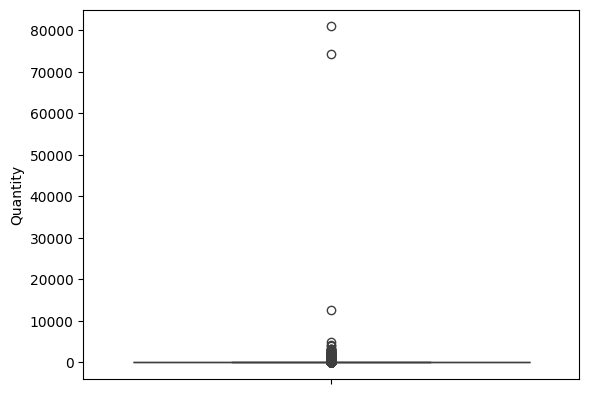

In [12]:
# Create a boxplot to visualize the distribution of the 'Quantity' column
sns.boxplot(y=df['Quantity'])

<Axes: ylabel='UnitPrice'>

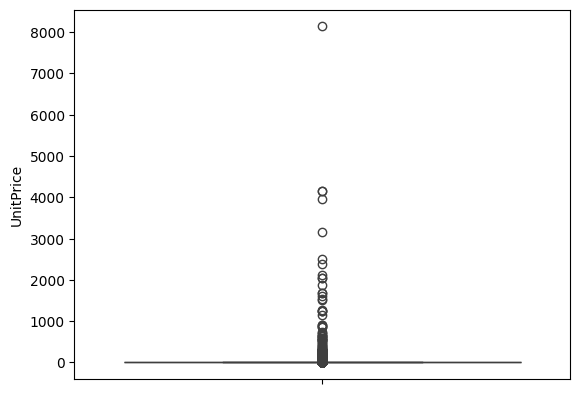

In [13]:
sns.boxplot(y=df['UnitPrice'])

In [14]:
# Filter rows where 'UnitPrice' is greater than 2000
df[df['UnitPrice']> 2000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
95766,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744.0,Singapore
95769,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744.0,Singapore
116879,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom
206453,562946,M,Manual,1,2011-08-11 09:38:00,2500.00,15581.0,United Kingdom
241516,566927,M,Manual,1,2011-09-15 15:20:00,2033.10,17846.0,United Kingdom
266749,569382,M,Manual,1,2011-10-03 16:44:00,3155.95,15502.0,United Kingdom
292045,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744.0,Singapore
292046,571751,M,Manual,1,2011-10-19 11:18:00,2118.74,12744.0,Singapore
305367,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536.0,France
305391,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536.0,France


In [15]:
# Filter rows where 'Description' is 'POSTAGE' and 'UnitPrice' is greater than 500
df[(df['Description'] == 'Manual') & (df['UnitPrice']> 2000)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
95766,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744.0,Singapore
95769,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744.0,Singapore
206453,562946,M,Manual,1,2011-08-11 09:38:00,2500.00,15581.0,United Kingdom
241516,566927,M,Manual,1,2011-09-15 15:20:00,2033.10,17846.0,United Kingdom
266749,569382,M,Manual,1,2011-10-03 16:44:00,3155.95,15502.0,United Kingdom
292045,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744.0,Singapore
292046,571751,M,Manual,1,2011-10-19 11:18:00,2118.74,12744.0,Singapore
305367,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536.0,France
305391,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536.0,France


In [16]:
# Filter rows where 'Description' is 'POSTAGE' and 'UnitPrice' is greater than 500
df[(df['Description'] == 'POSTAGE') & (df['UnitPrice'] > 500)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
116879,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom
127050,552980,POST,POSTAGE,1,2011-05-12 14:52:00,523.00,12590.0,Germany
163890,557754,POST,POSTAGE,1,2011-06-22 13:12:00,700.00,12432.0,Norway
182492,560187,POST,POSTAGE,1,2011-07-15 12:05:00,550.94,17444.0,Canada


In [17]:
# Check for missing values in each column again
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [18]:
# Count the occurrences of each unique value in the 'Description' column
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2016
REGENCY CAKESTAND 3 TIER               1714
JUMBO BAG RED RETROSPOT                1615
ASSORTED COLOUR BIRD ORNAMENT          1395
PARTY BUNTING                          1390
                                       ... 
ROCOCO WALL MIROR                         1
POTTING SHED SOW 'N' GROW SET             1
PINK CRYSTAL GUITAR PHONE CHARM           1
GLASS AND PAINTED BEADS BRACELET OL       1
PAPER CRAFT , LITTLE BIRDIE               1
Name: count, Length: 3877, dtype: int64

In [19]:
# Count the occurrences of each unique value in the 'Country' column
df['Country'].value_counts()

Country
United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


In [20]:
# Create a new column 'sales' by multiplying 'Quantity' and 'UnitPrice'
df['sales'] = df['Quantity']* df['UnitPrice']

In [ ]:
# Display all unique values in the 'Country' column to identify any anomalies
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [ ]:
# Display all unique values in the 'Quantity' column to identify any anomalies
df['Quantity'].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,    70,   252,    60,   216,   384,
          27,   108,    52,    75,   270,    42,   240,    90,   320,
          17,  1824,   204,    69,   160,  2880,  1400,    19,    39,
          56,    13,  1440,    15,   720,   156,   324,    41,   402,
         378,   150,   300,    22,    34,   408,   972,   208,  1008,
          26,  1000,  1488,   250,  1394,   400,   110,    37,    78,
          21,   272,    84,    47,  1728,    38,    53,    76,   576,
          29,  2400,   500,   180,   960,  1296,   147,   168,   256,
          54,    31,   860,  1010,  1356,  1284,   186,   114,   360,
        1930,  2000,  3114,  1300,   670,   176,   648,    62, 74215,
          89,    33,

In [26]:
df['UnitPrice'].unique()

array([2.55000e+00, 3.39000e+00, 2.75000e+00, 7.65000e+00, 4.25000e+00,
       1.85000e+00, 1.69000e+00, 2.10000e+00, 3.75000e+00, 1.65000e+00,
       4.95000e+00, 9.95000e+00, 5.95000e+00, 7.95000e+00, 8.50000e-01,
       6.50000e-01, 1.25000e+00, 2.95000e+00, 1.95000e+00, 4.20000e-01,
       1.80000e+01, 1.06000e+00, 6.95000e+00, 1.09500e+01, 3.45000e+00,
       5.50000e-01, 3.80000e-01, 1.45000e+00, 3.95000e+00, 6.75000e+00,
       1.49500e+01, 1.69500e+01, 6.45000e+00, 1.27500e+01, 1.99500e+01,
       8.50000e+00, 3.82000e+00, 3.37000e+00, 5.45000e+00, 6.35000e+00,
       7.20000e-01, 6.40000e-01, 1.00000e-01, 3.20000e-01, 1.48000e+00,
       1.65000e+02, 3.57500e+01, 4.65000e+00, 2.90000e-01, 3.35000e+00,
       1.06500e+01, 1.50000e+01, 9.50000e-01, 2.10000e-01, 1.20000e-01,
       2.40000e-01, 3.25000e+00, 1.49000e+00, 2.25000e+00, 1.55000e+00,
       1.89500e+01, 8.95000e+00, 5.00000e+01, 2.99500e+01, 4.60000e+00,
       1.05000e+00, 5.49000e+00, 1.90000e-01, 1.07500e+01, 7.995

In [27]:
# After reviewing the values in the 'UnitPrice' column, round the values to two decimal places
df['UnitPrice'] = df['UnitPrice'].round(2)

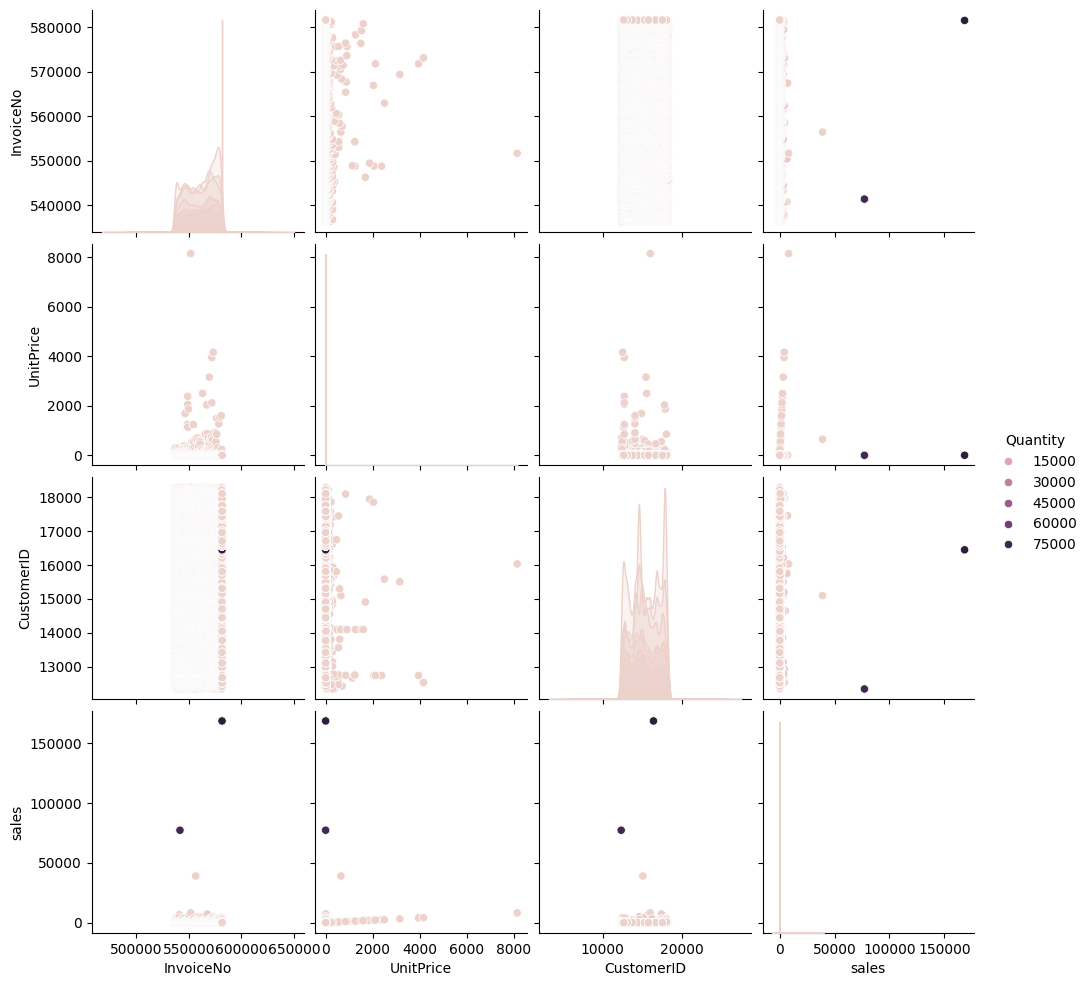

In [ ]:
# Create a pairplot to visualize pairwise relationships between numerical features in the dataframe.
# This helps to identify patterns, correlations, and potential outliers in the data.
sns.pairplot(df , hue='Quantity')

In [33]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
168247,558262,22352,LUNCH BOX WITH CUTLERY RETROSPOT,60,2011-06-28 08:45:00,2.10,14646.0,Netherlands,126.00
229672,565734,23151,ZINC SWEETHEART SOAP DISH,2,2011-09-06 12:15:00,2.49,17191.0,United Kingdom,4.98
360431,578270,21935,SUKI SHOULDER BAG,4,2011-11-23 13:39:00,1.63,14096.0,United Kingdom,6.52
55838,544068,20675,BLUE POLKADOT BOWL,2,2011-02-15 14:08:00,1.25,16431.0,United Kingdom,2.50
273250,569910,22355,CHARLOTTE BAG SUKI DESIGN,10,2011-10-06 16:47:00,0.85,17139.0,United Kingdom,8.50


In [ ]:
# Save the cleaned dataset to a CSV file for further analysis or visualization
df.to_csv('dataset - Copy.csv', index=False)